In [1]:
import numpy as np  # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle



from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

import keras
from keras.utils import np_utils
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *
from keras.callbacks import *

In [2]:

benign=pd.read_csv('1.benign.csv')
g_c=pd.read_csv('1.gafgyt.combo.csv')
g_j=pd.read_csv('1.gafgyt.junk.csv')
g_s=pd.read_csv('1.gafgyt.scan.csv')
g_t=pd.read_csv('1.gafgyt.tcp.csv')
g_u=pd.read_csv('1.gafgyt.udp.csv')
m_a=pd.read_csv('1.mirai.ack.csv')
m_sc=pd.read_csv('1.mirai.scan.csv')
m_sy=pd.read_csv('1.mirai.syn.csv')
m_u=pd.read_csv('1.mirai.udp.csv')
m_u_p=pd.read_csv('1.mirai.udpplain.csv')

In [3]:
benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

In [4]:
data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [5]:
data.groupby('type')['type'].count()

type
benign             49548
gafgyt_combo       59718
gafgyt_junk        29068
gafgyt_scan        29849
gafgyt_tcp         92141
gafgyt_udp        105874
mirai_ack         102195
mirai_scan        107685
mirai_syn         122573
mirai_udp         237665
mirai_udpplain     81982
Name: type, dtype: int64

In [6]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
627531,112.320394,467.909026,40012.193709,199.986949,431.323251,50008.608313,626.250031,400.268884,56393.135202,6298.898718,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai_ack
414406,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_tcp
466858,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_tcp
717051,151.456626,60.001871,0.028065,176.841201,60.007840,0.117539,319.288609,60.021877,0.327676,2356.222446,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai_scan
229968,142.275736,396.771477,52950.081089,218.342589,406.964860,51015.959196,626.128000,394.315437,53381.912977,6413.668512,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai_udp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397823,43.190575,74.197056,4.690513,57.640444,74.249410,5.928409,109.337338,74.411189,24.086370,874.503548,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,gafgyt_scan
77607,101.972620,507.602025,20767.827580,183.828035,466.018617,35722.079536,606.765420,410.864654,50221.124320,6301.883729,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai_udp
57930,153.339821,280.778594,60321.423971,231.944007,327.141517,60603.082291,649.484646,368.937590,57170.554906,5973.564809,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai_udp
185010,122.037823,453.108221,39661.386815,212.185818,418.423424,48593.747323,650.376510,390.843788,53976.228483,6419.579197,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai_udp


In [7]:
labels_full=pd.get_dummies(data['type'], prefix='type')
labels_full.head()

,type_benign,type_gafgyt_combo,type_gafgyt_junk,type_gafgyt_scan,type_gafgyt_tcp,type_gafgyt_udp,type_mirai_ack,type_mirai_scan,type_mirai_syn,type_mirai_udp,type_mirai_udpplain
627531,0,0,0,0,0,0,1,0,0,0,0
414406,0,0,0,0,1,0,0,0,0,0,0
466858,0,0,0,0,1,0,0,0,0,0,0
717051,0,0,0,0,0,0,0,1,0,0,0
229968,0,0,0,0,0,0,0,0,0,1,0


In [8]:
#drop labels from training dataset
data=data.drop(columns='type')
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
627531,112.320394,467.909026,40012.193709,199.986949,431.323251,50008.608313,626.250031,400.268884,56393.135202,6298.898718,...,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0
414406,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
466858,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
717051,151.456626,60.001871,0.028065,176.841201,60.007840,0.117539,319.288609,60.021877,0.327676,2356.222446,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
229968,142.275736,396.771477,52950.081089,218.342589,406.964860,51015.959196,626.128000,394.315437,53381.912977,6413.668512,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0


In [9]:
#standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
627531,0.274657,1.686682,0.806769,0.491548,1.519705,1.046391,0.659276,1.347165,1.180058,0.777232,...,-0.011451,-0.009765,-0.011037,-0.205909,1.710807,-0.01532,1.704178,-0.011606,-0.010185,0.0
414406,-1.470152,-0.813453,-0.782557,-1.476902,-0.852912,-0.822029,-1.471853,-0.883094,-0.842441,-1.467856,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
466858,-1.470152,-0.813453,-0.782557,-1.476902,-0.852912,-0.822029,-1.471853,-0.883094,-0.842441,-1.467856,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
717051,0.888069,-0.813441,-0.782556,0.262582,-0.852861,-0.822024,-0.386985,-0.882950,-0.842430,-0.628261,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
229968,0.744170,1.250670,1.320675,0.673129,1.364064,1.084028,0.658860,1.308143,1.072063,0.818146,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0


In [10]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[ 0.27465688,  1.68668216,  0.80676861, ..., -0.01160613,
        -0.01018533,  0.        ],
       [-1.47015223, -0.8134528 , -0.78255711, ..., -0.01160613,
        -0.01018533,  0.        ],
       [-1.47015223, -0.8134528 , -0.78255711, ..., -0.01160613,
        -0.01018533,  0.        ],
       ...,
       [ 0.91758553,  0.53973197,  1.61347224, ..., -0.01160613,
        -0.01018533,  0.        ],
       [ 0.42696553,  1.59596583,  0.79283419, ..., -0.01160613,
        -0.01018533,  0.        ],
       [ 1.42857684,  0.36670048,  1.52300839, ..., -0.01160613,
        -0.01018533,  0.        ]])

In [11]:
#labels for training
labels=labels_full.values
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [12]:
#Validation Technique
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(712808, 115)
(203660, 115)
(101830, 115)


In [13]:
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)

(712808, 115, 1)
(203660, 115, 1)
(101830, 115, 1)


In [14]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
from keras import regularizers


# Build Model CNN_LSTM
gru_model = Sequential()
gru_model.add(Conv1D(filters = 64, kernel_size = (5), input_shape = (train_data_st.shape[1], 1)))
gru_model.add(MaxPooling1D(pool_size= (3)))
gru_model.add(Dropout(0.2))
gru_model.add(Conv1D(filters = 32, kernel_size = (5), padding = 'same'))
#cnn_model.add(MaxPooling1D(pool_size= (1)))
#cnn_model.add(Dropout(0.2))



gru_model.add(Bidirectional(GRU(128, activation = 'relu')))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(128, activation = 'relu'))
gru_model.add(Dense(64, activation = 'relu'))
gru_model.add(Dense(64, activation = 'relu'))
gru_model.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
gru_model.add(Dense(labels.shape[1], activation = 'sigmoid'))

gru_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.0005, patience=8, 
                                           restore_best_weights=True )

In [ ]:
epochs = 10
batch_size = 256
history = gru_model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate)
    #validation_split=0.10,
)


#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600, quality = 100, optimize = True)
    plt.show()

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Epoch 1/10
 456/2784 [===>..........................] - ETA: 5:38 - loss: 0.2090 - accuracy: 0.6456

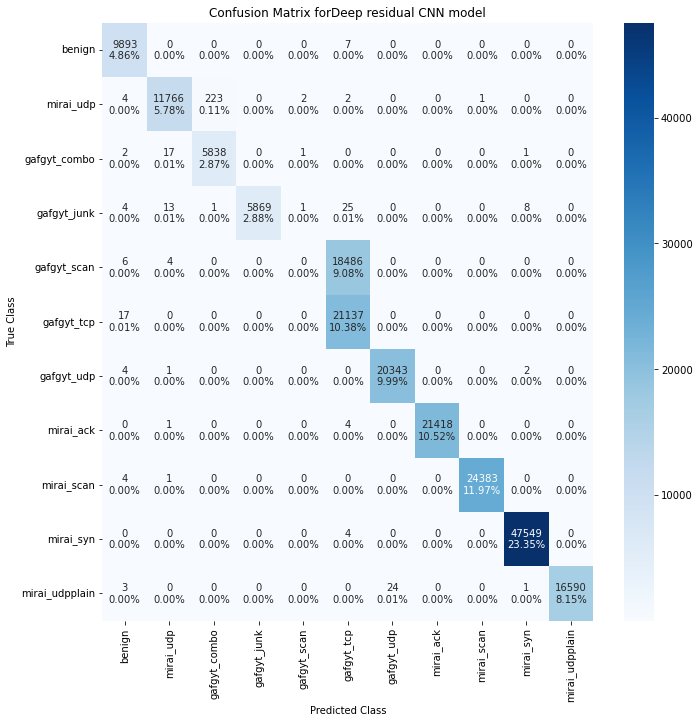

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(11,11)

label = ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']

plt.figure(figsize=(11,11))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()


In [38]:
print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      9900
     mirai_udp       1.00      0.98      0.99     11998
  gafgyt_combo       0.96      1.00      0.98      5859
   gafgyt_junk       1.00      0.99      1.00      5921
   gafgyt_scan       0.00      0.00      0.00     18496
    gafgyt_tcp       0.53      1.00      0.70     21154
    gafgyt_udp       1.00      1.00      1.00     20350
     mirai_ack       1.00      1.00      1.00     21423
    mirai_scan       1.00      1.00      1.00     24388
     mirai_syn       1.00      1.00      1.00     47553
mirai_udpplain       1.00      1.00      1.00     16618

      accuracy                           0.91    203660
     macro avg       0.86      0.91      0.88    203660
  weighted avg       0.86      0.91      0.88    203660

6365/6365 [==============================] - 30s 5ms/step - loss: 0.1423 - accuracy: 0.9073
Test: accuracy = 0.907326  ;  loss = 0.142255
